In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

# image = np.array(
#     Image.open("comfyui_sandbox/video_renders/render_nfs_4screens_6/000000010.png")
# )
# image_resized = resize(
#     image,
#     (2160, 3840),
#     anti_aliasing=True,
# )

In [3]:
import cv2
import numpy as np
from PIL import Image

width = 1920
height = 1080
file_path = "comfyui_sandbox/video_renders/render_nfs_4screens_6/000000100.png"
# img = cv2.imread()
img = np.array(Image.open(file_path))
res = cv2.resize(img, dsize=(width * 2, height * 2), interpolation=cv2.INTER_LANCZOS4)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
res = res[height:, width:]

In [4]:
import imageio



imageio.imwrite("test.png", res)

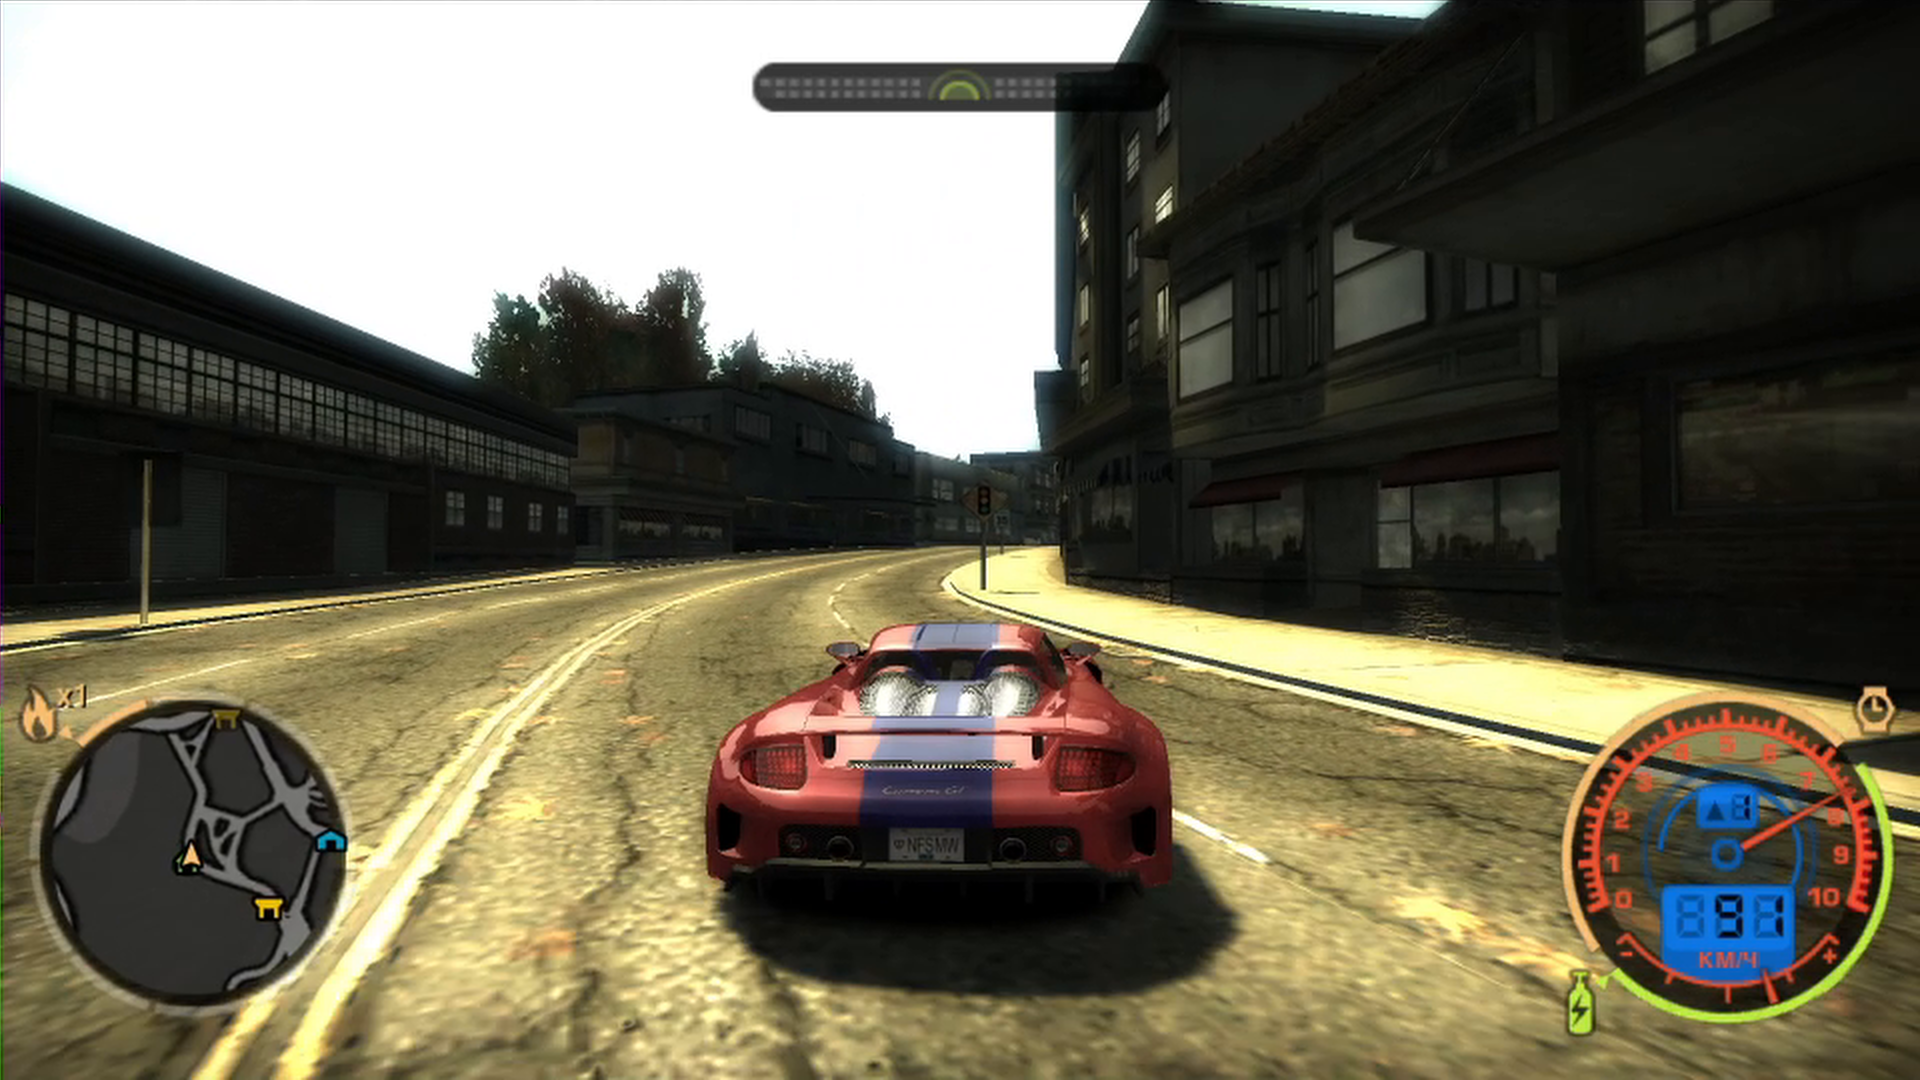

In [6]:
# Image.fromarray(image_resized.astype(np.uint8))
Image.fromarray(res)

In [2]:
import os
from pathlib import Path
from PIL import Image
import cv2
import numpy as np
from tqdm.notebook import tqdm
import concurrent
import imageio

width = 1920
height = 1080

original_images_path = "comfyui_sandbox/video_renders/render_nfs_4screens_6/"
styled_images_path = "comfyui_sandbox/video_renders/render_nfs_4screens_6_sdxl_1_part_3"
target_folder = "comfyui_sandbox/video_renders/render_nfs_4screens_6_game/"

os.system(f"mkdir -p {target_folder}")

original_images = sorted(list(Path(original_images_path).glob("*.png")))
styled_images = sorted(list(Path(styled_images_path).glob("*.png")))
styled_images_stems = set([item.stem for item in styled_images])

# for original_image in tqdm(styled_images):
#     if original_image.stem in styled_images_stems:

#         img = cv2.imread(original_image)
#         img = cv2.resize(img, dsize=(width*2, height*2), interpolation=cv2.INTER_LANCZOS4,)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = img[height:, width:]
#         img = Image.fromarray(img)
#         output_path = f'{target_folder}{original_image.stem}.png'
#         img.save(output_path)
# break


def resize_crop_img(original_image):
    if original_image.stem in styled_images_stems:
        img = cv2.imread(original_image)
        # img = np.array(Image.open(original_image))
        img = cv2.resize(
            img,
            dsize=(width * 2, height * 2),
            interpolation=cv2.INTER_LANCZOS4,
        )
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img[height:, width:]
        # img = Image.fromarray(img)
        output_path = f"{target_folder}{original_image.stem}.png"
        # img.save(output_path)
        imageio.imwrite(output_path, img)
    return 1


def crop_parallel(original_images, styled_images):
    # max_workers = 16*2
    # max_workers = 12
    max_workers = 20
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        list(
            tqdm(
                executor.map(
                    resize_crop_img,
                    original_images,
                ),
                total=len(styled_images),
            )
        )


crop_parallel(
    original_images=original_images,
    styled_images=styled_images,
)

  0%|          | 0/15467 [00:00<?, ?it/s]